# Лабораторная работ №3 - "Подбор гиперпараметров модели" (ИНДИВИДУАЛЬНАЯ)

---

###### Выполнил: Агейкин Е. А.
###### Группа: М8О-307Б-23
###### Датасет (ссылка): https://www.kaggle.com/datasets/hugomathien/soccer/data

---

# Задание:

0. Выбрать модель для обучения (Desicion tree, Random forest, SVM, KNN, Boosting)
1. Показать какие гиперпараметры есть у выбранной модели (В виде таблички).
2. Выбрать датасет для обучения и взависимости от модели подготовить данные
3. Подобрать гиперпараметры для модели и сравнить лучшие подборы, для (Grid Search, RandomSearch, Optuna)
4. На самом лучшем обучении (Grid Search, RandomSearch, Optuna) сделать калькулятор, который показывает `локальную интерпретацию` с помощью [LIME](https://habr.com/ru/companies/otus/articles/779430/) и `глобальную интерпретацию` с помощью [SHAP](https://habr.com/ru/companies/ods/articles/599573/).

    [Доп статья](https://habr.com/ru/companies/wunderfund/articles/739744/)

# Датасеты на выбор (2 человека на датасет)

Нужно будет выбрать датасет и самим придумать задачу (регрессия или классификация)

* [Мошенические операции с картами](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
* [Фильмы](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)
* [Рак молочной железы](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)
* [Кодвид](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)
* [Футбол](https://www.kaggle.com/datasets/hugomathien/soccer)
* [Цена мобильных телефонов](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)
* [120 лет Олимпийской истории](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
* [Фитнесс](https://www.kaggle.com/datasets/arashnic/fitbit)
* [Употребление алкоголя студентами](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
* [Переносы рейсов самолетов](https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv)
* [Покемоны](https://www.kaggle.com/datasets/abcsds/pokemon)
* [Формула 1](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)
* [Набор данных сердечно сосудистых заболеваний](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)
* [Spotify](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)
* [Качество воды](https://www.kaggle.com/datasets/adityakadiwal/water-potability)
* [Цена на машину](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)
* [Женщины и одежда](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews)
* [Факторы успеваемости студентов](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)
* [Продукты](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
* [Видео игры](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
* [Машины](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
* [BMW продажи](https://www.kaggle.com/datasets/ahmadrazakashif/bmw-worldwide-sales-records-20102024)
* [Землетрясения](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset)
* [Медицинские коляски](https://www.kaggle.com/datasets/jaderz/hospital-beds-management)
* [Фондовый рынок](https://www.kaggle.com/datasets/prince7489/stock-market-dataset)
* [Steam](https://www.kaggle.com/datasets/lunthu/steam-monthly-average-players)
* [Anime](https://www.kaggle.com/datasets/neelagiriaditya/anime-dataset-jan-1917-to-oct-2025)
* [YouTube](https://www.kaggle.com/datasets/neelagiriaditya/anime-dataset-jan-1917-to-oct-2025)
* [Электрички](https://www.kaggle.com/datasets/alamshihab075/electric-vehicle-population-dataset)


# Сроки

- до 17.11.25 оценка 5
- до 24.11.25 оценка 4

# Формат сдачи

1. Защита преподавателю
2. Презентация о проделанной работе (10-15 слайдов)
3. Файл `FIO_lr3.ibynb`

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "database.sqlite"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "hugomathien/soccer",
    file_path,
    sql_query="SELECT * FROM Player_Attributes"
)

print(df.head())

C:\Users\egora\AppData\Local\Temp\ipykernel_7204\3067764800.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

Найдем целевую переменную, числовые и категориальные признаки

1. Фиксируем x, y и списки признаков

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid", context="notebook")

target_col = 'preferred_foot'
y = df[target_col]

X = df.drop(columns=[target_col, 'id', 'date', 'attacking_work_rate', 'defensive_work_rate'])

print("Форма X:", X.shape)
print("Форма y:", y.shape)
print("\nРаспределение целевой переменной:")
print(y.value_counts())

# Преобразуем категориальную целевую переменную в числовую для корреляционного анализа
y_numeric = y.map({'right': 1, 'left': 0})

# Получаем списки признаков
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("\nЧисловые признаки:", len(numeric_cols))
print("Категориальные признаки:", categorical_cols)

Форма X: (183978, 37)
Форма y: (183978,)

Распределение целевой переменной:
preferred_foot
right    138409
left      44733
Name: count, dtype: int64

Числовые признаки: 37
Категориальные признаки: []


Анализ связи числовых признаков с целевой переменной

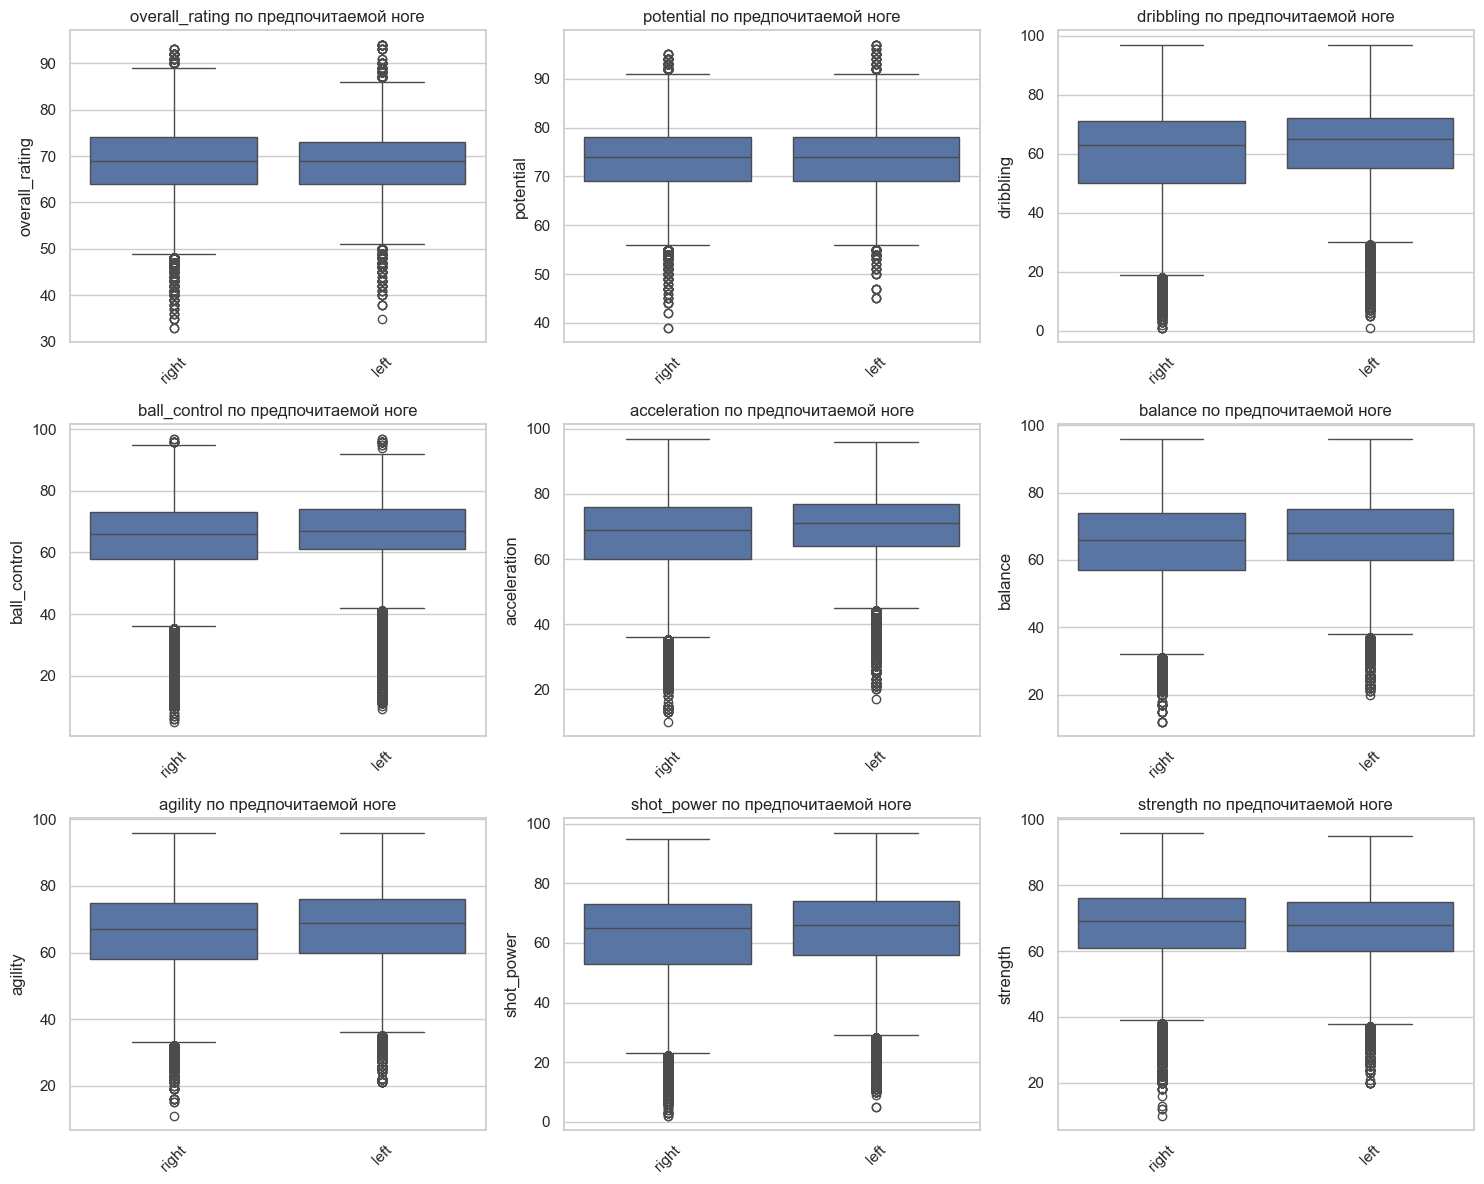

In [ ]:
# Визуализация распределения числовых признаков для разных значений целевой переменной
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Выбираем 9 наиболее интересных числовых признаков для визуализации
selected_features = [
    'overall_rating', 'potential', 'dribbling', 'ball_control', 
    'acceleration', 'balance', 'agility', 'shot_power', 'strength'
]

for i, feature in enumerate(selected_features[:9]):
    ax = axes[i]
    # Box plot для сравнения распределений
    data_to_plot = df[['preferred_foot', feature]].dropna()
    sns.boxplot(x='preferred_foot', y=feature, data=data_to_plot, ax=ax)
    ax.set_title(f'{feature} по предпочитаемой ноге')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Топ-10 признаков по абсолютной корреляции с preferred_foot:
preferred_foot_numeric    1.000000
crossing                  0.174888
curve                     0.128988
free_kick_accuracy        0.124433
sliding_tackle            0.098504
marking                   0.095611
long_passing              0.094220
standing_tackle           0.091692
dribbling                 0.084271
gk_handling               0.078743
acceleration              0.078138
Name: preferred_foot_numeric, dtype: float64


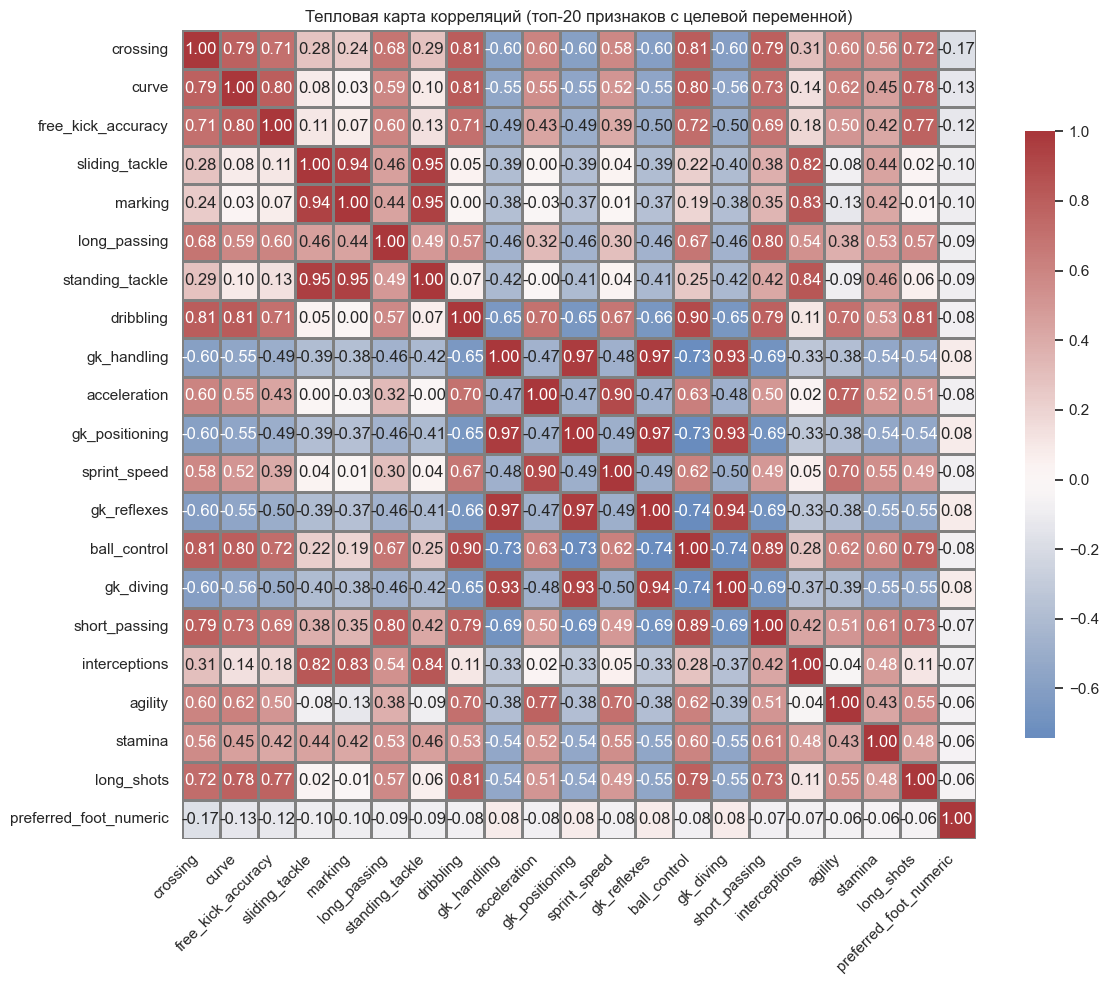

In [ ]:
# Создаем DataFrame для корреляционного анализа
df_corr = X[numeric_cols].copy()
df_corr['preferred_foot_numeric'] = y_numeric

# Вычисляем корреляционную матрицу
corr_matrix = df_corr.corr()

# Сортируем признаки по корреляции с целевой переменной
corr_with_target = corr_matrix['preferred_foot_numeric'].abs().sort_values(ascending=False)

print("Топ-10 признаков по абсолютной корреляции с preferred_foot:")
print(corr_with_target.head(11))  # 11 потому что первый будет сама целевая переменная

# Визуализируем тепловую карту для топ-20 наиболее коррелированных признаков
top_n = 20
top_features = corr_with_target.index[1:top_n+1].tolist()  # исключаем саму целевую переменную
top_features.append('preferred_foot_numeric')

plt.figure(figsize=(12, 10))
sns.heatmap(
    df_corr[top_features].corr(),
    annot=True,
    fmt='.2f',
    cmap='vlag',
    center=0,
    linewidths=0.8,
    linecolor='gray',
    cbar_kws={'shrink': 0.75}
)
plt.title(f'Тепловая карта корреляций (топ-{top_n} признаков с целевой переменной)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Как мы видим, предпочитаемая нога футболиста наиболее влияет на его параметры crossing, curve(закрутка), а также аккуратность исполнения штрафных ударов.

Подготовим данные для модели Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Удаляем строки с NaN в y_numeric
mask_notna = y_numeric.notna()
X_clean = X[mask_notna].copy()
y_clean = y_numeric[mask_notna].copy()

min_len = min(len(X_clean), len(y_clean))
X_new = X_clean.iloc[:min_len]
y_new = y_clean.iloc[:min_len]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42
)

# DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Простая модель без трансформеров
model_pipeline = Pipeline(steps=[
    ('model', dt_model)
])

# Обучение
model_pipeline.fit(X_train, y_train)

# Предсказание
y_pred = model_pipeline.predict(X_test)

# Метрики
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2:  {r2:.3f}")

MAE:  0.28
RMSE: 0.38
R^2:  0.214


Модель демонстрирует хорошее качество предсказаний: средняя абсолютная ошибка составляет около 0.28, среднеквадратичная ошибка — 0.38, а коэффициент детерминации R² равен 0.214, что говорит о том, что дерево решений объясняет примерно 22% дисперсии целевой переменной на тестовых данных.

Выведем параметры модели и гиперпараиетры для улучшения

In [ ]:
print("параметры дерева решений:")
params = dt_model.get_params()
print(params)

# 2. Получаем важность признаков
importances = dt_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({
    'Признак': feature_names,
    'Важность': importances
}).sort_values(by='Важность', ascending=False)

print("\nВажность признаков:")
print(feature_importances)

# 3. Гиперпараметры, которые можно улучшать
improvable_params = [
    'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'criterion'
]
print("\nГиперпараметры для тюнинга:")
print(improvable_params)

параметры дерева решений:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Важность признаков:
               Признак  Важность
4             crossing  0.142524
11  free_kick_accuracy  0.067558
0   player_fifa_api_id  0.056836
1        player_api_id  0.056230
5            finishing  0.055917
10               curve  0.051711
7        short_passing  0.039300
27              vision  0.036774
8              volleys  0.028858
6     heading_accuracy  0.028632
19          shot_power  0.027700
24          aggression  0.027022
18             balance  0.026123
28           penalties  0.025560
20             jumping  0.024080
34          gk_kicking  0.019566
16             agility  0.019189
17           reactions  0.019179
12        long_passing  0.018204
35      

| Гиперпараметр            | Описание                                                                               |
| ------------------------ | -------------------------------------------------------------------------------------- |
| criterion                | Критерий, используемый для оценки качества разбиения ветки (например, ‘squared_error’) |
| max_depth                | Максимальная глубина дерева, ограничивает сложность, предотвращает переобучение        |
| min_samples_split        | Минимальное количество объектов для разделения узла (увеличение снижает переобучение)  |
| min_samples_leaf         | Минимальное количество объектов в листе (увеличение сглаживает дерево)                 |
| max_features             | Максимальное количество признаков, используемых для поиска лучшего разбиения           |
| random_state             | Фиксирует генератор случайных чисел для воспроизводимости результатов                  |
| splitter                 | Стратегия выбора разбиения: ‘best’ (лучшее) или ‘random’                               |
| max_leaf_nodes           | Ограничивает максимальное число листьев в дереве                                       |
| min_weight_fraction_leaf | Минимальная доля веса всех объектов в листе (актуально для взвешенных объектов)        |

Эти параметры управляют структурой дерева и качеством обучения. При подборе оптимальных значений меняют, в первую очередь:
max_depth, min_samples_split, min_samples_leaf, max_features, criterion.

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Задать сетку гиперпараметров для перебора
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Обучение по обучающей выборке
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
print("Лучшие гиперпараметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Расчёт метрик
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"MAE:  {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R^2:  {r2_best:.3f}")


Лучшие гиперпараметры: {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
MAE:  0.05
RMSE: 0.23
R^2:  0.719


Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

# Задать распределения гиперпараметров для перебора
param_dist = {
    'max_depth': [None] + list(range(3, 21)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=30,        # количество случайных наборов гиперпараметров
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

# Обучение на обучающей выборке
random_search.fit(X_train, y_train)

# Лучшая модель и параметры
print("Лучшие гиперпараметры:", random_search.best_params_)
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)

# Метрики для лучшей модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))
r2_random = r2_score(y_test, y_pred_random)

print(f"MAE:  {mae_random:.2f}")
print(f"RMSE: {rmse_random:.2f}")
print(f"R^2:  {r2_random:.3f}")


Лучшие гиперпараметры: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 14}
MAE:  0.12
RMSE: 0.28
R^2:  0.578


Optuna

In [ ]:
!pip install optuna


[notice] A new release of pip is available: 23.3.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def objective(trial):
    # Определяем пространство поиска гиперпараметров
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse'])
    }
    # Обучаем модель на трейне
    model = DecisionTreeRegressor(random_state=42, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Целевая функция — MAE (чем меньше, тем лучше)
    return mean_absolute_error(y_test, y_pred)

# Оптимизация с помощью Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params)
print("Лучшее значение MAE:", study.best_value)

# Для получения других метрик на тесте:
best_model = DecisionTreeRegressor(random_state=42, **study.best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R^2:  {r2_score(y_test, y_pred):.3f}")


[I 2025-12-05 14:11:57,721] A new study created in memory with name: no-name-76bebee6-09ec-4249-8a4f-f38b5e0c0017
[I 2025-12-05 14:11:57,926] Trial 0 finished with value: 0.342242285727326 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 0 with value: 0.342242285727326.
[I 2025-12-05 14:11:58,107] Trial 1 finished with value: 0.3522005564032969 and parameters: {'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 0 with value: 0.342242285727326.
[I 2025-12-05 14:12:00,956] Trial 2 finished with value: 0.14399367734229093 and parameters: {'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': None, 'criterion': 'squared_error'}. Best is trial 2 with value: 0.14399367734229093.
[I 2025-12-05 14:12:01,305] Trial 3 finished with value: 0.3100463189453782 and parameters: {'max_depth': 10,

Лучшие параметры: {'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None, 'criterion': 'squared_error'}
Лучшее значение MAE: 0.10726252374731719
RMSE: 0.27
R^2:  0.603


In [ ]:
!pip install shap


[notice] A new release of pip is available: 23.3.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


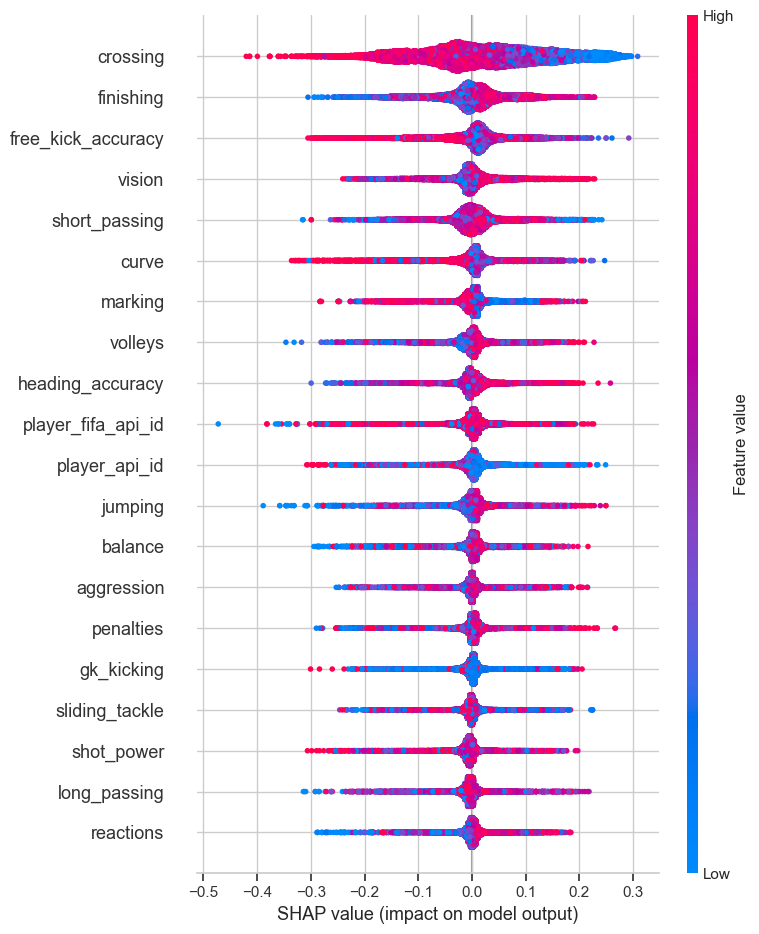

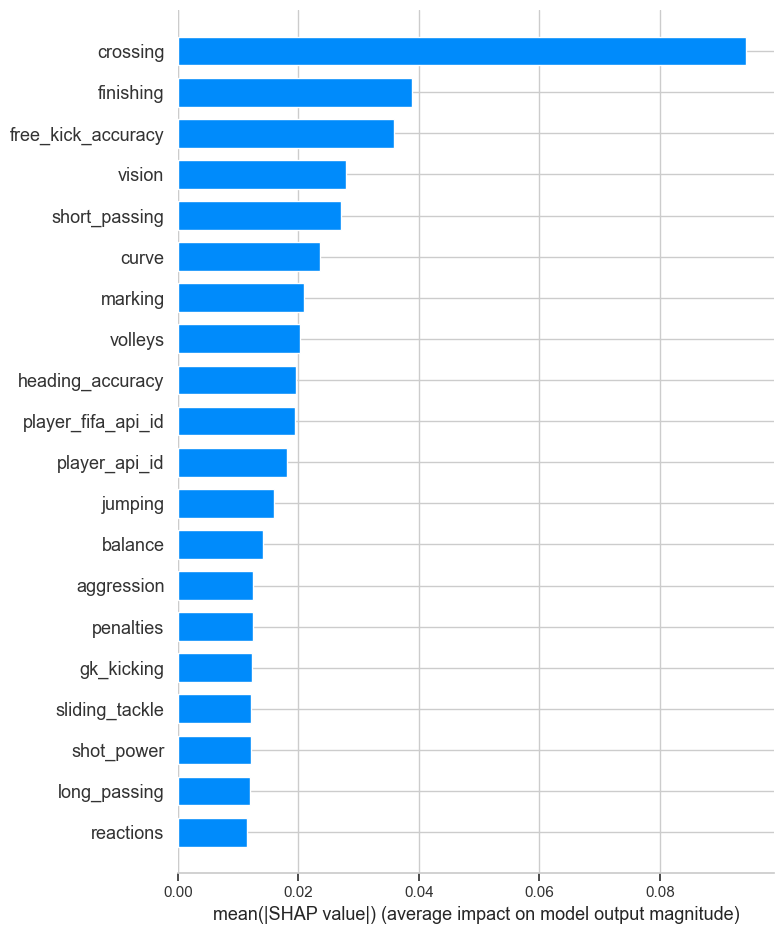

In [ ]:
import shap

# Создаём объяснитель для модели
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Важно! Для корректного результата X_test должен содержать только признаки, участвовавшие в обучении

# Сводный график (summary plot) — глобальное влияние признаков
shap.summary_plot(shap_values, X_test)

# График важности признаков (по среднему абсолютному значению SHAP-value)
shap.summary_plot(shap_values, X_test, plot_type="bar")


Lime

Очищенные данные: (146513, 37)


c:\Users\egora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


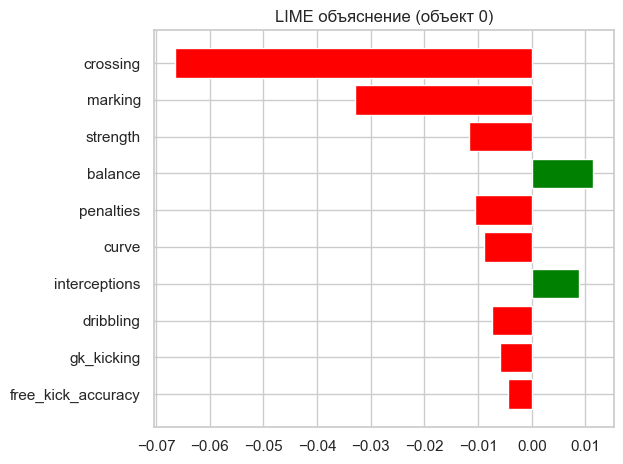

Объяснение в виде списка:
crossing: -0.06651719418846731
marking: -0.03297220715547715
strength: -0.011748810481155648
balance: 0.01141408432774274
penalties: -0.010556850711029001
curve: -0.008863445182185632
interceptions: 0.008760423292910996
dribbling: -0.00733764318507449
gk_kicking: -0.0058831746700302315
free_kick_accuracy: -0.004482208957401103


In [ ]:
# Самый простой рабочий вариант
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Убедимся, что данные чистые
X_train_clean = X_train.fillna(X_train.median())
X_test_clean = X_test.fillna(X_train.median())

# Удалим признаки с нулевой дисперсией
nonzero_var_cols = X_train_clean.columns[X_train_clean.var() > 0]
X_train_clean = X_train_clean[nonzero_var_cols]
X_test_clean = X_test_clean[nonzero_var_cols]

print(f"Очищенные данные: {X_train_clean.shape}")

# Создаем объяснитель
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_clean.values,
    feature_names=X_train_clean.columns.tolist(),
    mode='regression',
    discretize_continuous=False,  # важно!
    random_state=42
)

# Выбираем объект для объяснения
sample_idx = 0
sample = X_test_clean.iloc[sample_idx].values

# Создаем объяснение
exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=best_model.predict,
    num_features=10  # количество признаков для показа
)

# Визуализируем
fig = exp.as_pyplot_figure()
plt.title(f'LIME объяснение (объект {sample_idx})')
plt.tight_layout()
plt.show()

# Текстовый вывод
print("Объяснение в виде списка:")
for feature, importance in exp.as_list():
    print(f"{feature}: {importance}")

ВЫВОДЫ

Модель для конкретного футболиста считает, что его высокие показатели crossing и marking указывают на то, что он левоногий, но низкие показатели balance и strength уменьшают эту вероятность. В итоге модель взвешивает все эти факторы и выдает итоговое предсказание.